# ARIMA Model
This notebook contains experiments with an Autoregressive Integrated Moving Average Model which have not been completed. For reference only.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [3]:
from australian_housing import paths

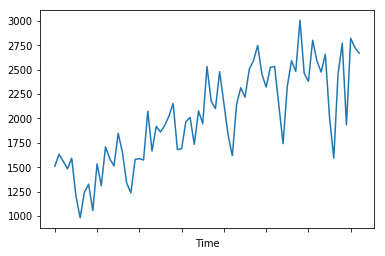

In [4]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, squeeze=True)
ts.plot();

In [5]:
model = ARIMA(ts, order=(1,1,1), freq='MS')
model_fit = model.fit()

In [6]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -507.610
Method:                       css-mle   S.D. of innovations            272.003
Date:                Wed, 23 Jan 2019   AIC                           1023.221
Time:                        20:34:21   BIC                           1032.327
Sample:                    08-01-2011   HQIC                          1026.846
                         - 07-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.6599      2.156      8.654      0.000      14.434      22.886
ar.L1.D.Value     0.3120      0.113      2.752      0.008       0.090       0.534
ma.L1.D.Value    -1.0000      0.046    -21.538      0.000      -1.091      -0.909
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2052           +0.0000j            3.2052            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
residuals = pd.DataFrame(model_fit.resid)

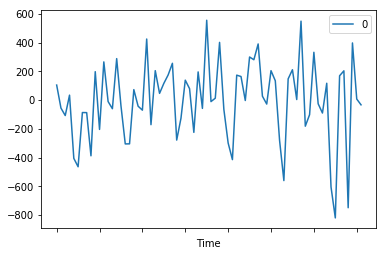

In [8]:
residuals.plot();

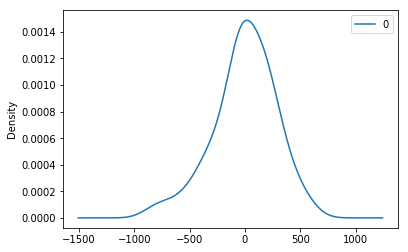

In [9]:
residuals.plot(kind='kde');

In [10]:
residuals.describe()

,0
count,72.000000
mean,-5.239589
std,278.715238
min,-819.494856
25%,-112.131379
50%,0.348727
75%,179.808685
max,555.072989


In [11]:
history = model_fit.predict(ts.index[12], ts.index[-1], typ='levels')
prediction = model_fit.predict(ts.index[-1], '2020-07-01', typ='levels')

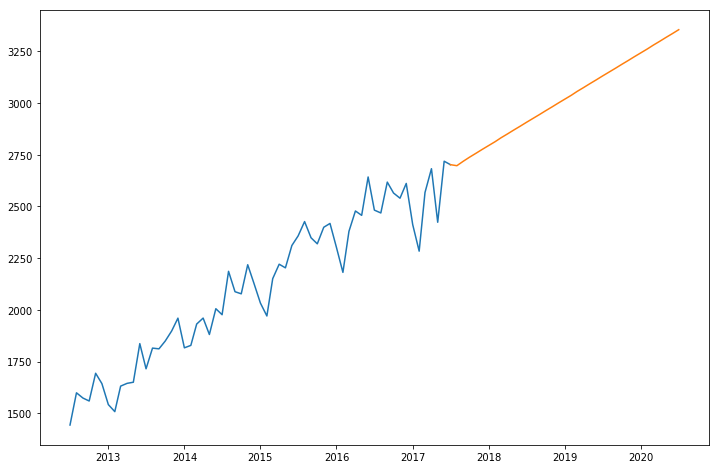

In [12]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(history);
ax.plot(prediction);

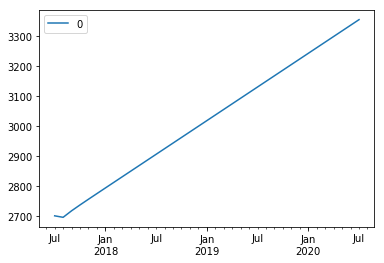

In [13]:
pd.DataFrame(model_fit.predict(ts.index[-1], '2020-07-01', typ='levels')).plot();